In [145]:
import random
import matplotlib.pyplot as plt

In [146]:
#variabel skalar
jumlah_sample = 25
rasio_terinfeksi = 0.2
pemulihan = 10
xmin,ymin = 0, 0
xmax,ymax = 20, 20
jml_terinfeksi = 0

In [147]:
def random_walk():
    xrand = []
    yrand = []

    
    xrange = xmax - xmin
    yrange = ymax - ymin

    x_position = random.randint(xmin,xmax)
    y_position = random.randint(ymin,ymax)

    n = 20 #jumlah iterasi

    gerak = random.uniform(0,1);
    if (gerak <= 0,8):
        for i in range(n):
            rand = random.uniform(0,1)
            if (rand <= 0.25):
                x_position += 1
            elif (rand > 0.25 and rand <= 0.5):
                y_position -= 1
            elif (rand > 0.5 and rand <= 0.75):
                x_position -= 1
            else:
                y_position += 1

            #correction biar nembus
            if (x_position > xmax):
                x_position -= xrange
            if (x_position < xmin):
                x_position += xrange
            if (y_position > ymax):
                y_position -= yrange
            if (y_position < ymin):
                y_position += yrange
            xrand.append(x_position)
            yrand.append(y_position)

    return xrand,yrand


In [148]:
#POSISI
x = []
y = []

for i in range(jumlah_sample):
    xrand,yrand = random_walk()
    x.append(xrand)
    y.append(yrand)



In [149]:
#STATUS
arr_status = []

for i in range(jumlah_sample):
    status = random.uniform(0,1)
    if (status <= rasio_terinfeksi):
        arr_status.append("sakit")
    else:
        arr_status.append("sehat")

In [150]:
#IMUNITAS
arr_imunitas = []

for i in range(jumlah_sample):
    arr_imunitas.append(0)

In [151]:
#WAKTU INFEKSI
arr_waktuinfeksi = []

for i in range(jumlah_sample):
    if (arr_status[i] == "sakit"):
        arr_waktuinfeksi.append(1)
    else:
        arr_waktuinfeksi.append(0)
print(arr_waktuinfeksi)

[1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]


In [152]:
def cek_jarak(n): #KEMUNGKINAN SALAH DISINI
    for i in range(jumlah_sample):
        if arr_status[i] == "sakit":
            x_sakit = x[i][n]
            y_sakit = y[i][n]
            for j in range(jumlah_sample):
                if (x[j][n] == x_sakit) and (y[j][n] == y_sakit) and (arr_imunitas[j] == 0) and (i != j) and (arr_status[j] == "sehat"):
                    arr_status[j] = "sakit"
                    arr_waktuinfeksi[j] = 1

In [153]:
def waktu_pemulihan(): #KEMUNGKINAN SALAH DISINI
    for i in range(jumlah_sample):
        if(arr_status[i] == "sakit") and (arr_waktuinfeksi[i] > pemulihan):
            arr_imunitas[i] = 1
            arr_status[i] = "sehat"
        elif(arr_status[i] == "sakit"):
            arr_waktuinfeksi[i] += 1

In [154]:
print("SEBELUM")
print(arr_waktuinfeksi)
print(arr_status)
print(arr_imunitas)
jml_sakit = 0
for i in range(jumlah_sample):
    if(arr_status[i] == "sakit"):
        jml_sakit += 1
print(jml_sakit)

SEBELUM
[1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
['sakit', 'sakit', 'sehat', 'sehat', 'sehat', 'sehat', 'sakit', 'sehat', 'sehat', 'sehat', 'sehat', 'sehat', 'sehat', 'sehat', 'sehat', 'sehat', 'sakit', 'sehat', 'sehat', 'sehat', 'sehat', 'sehat', 'sakit', 'sehat', 'sehat']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5


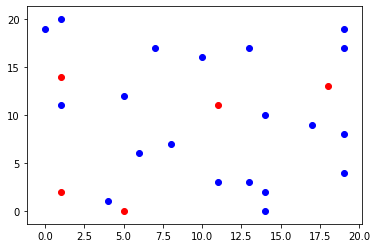

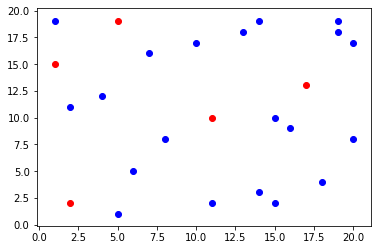

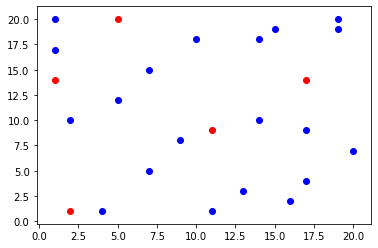

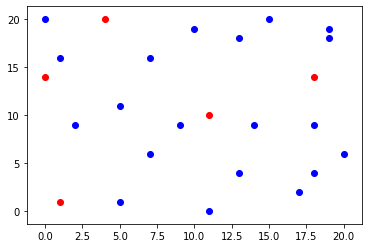

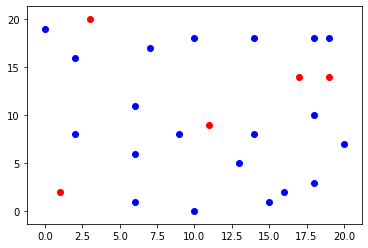

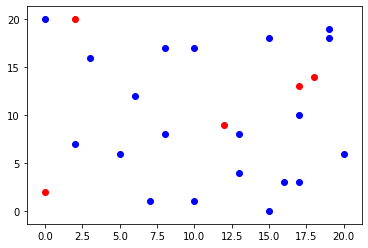

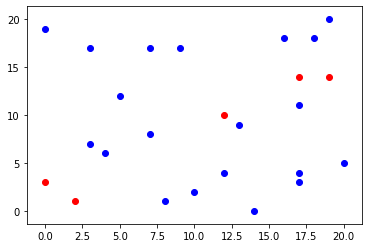

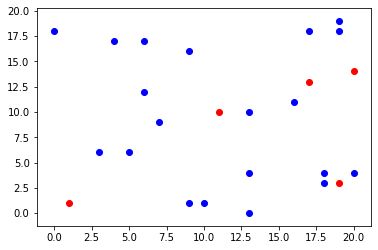

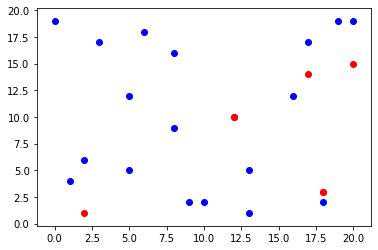

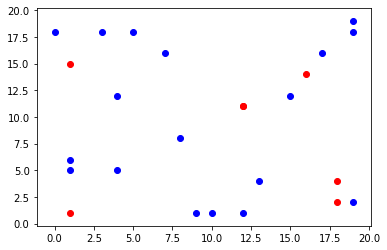

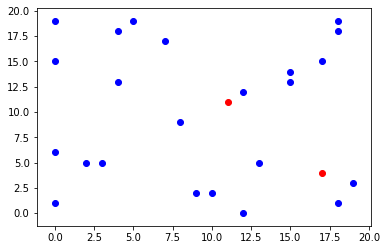

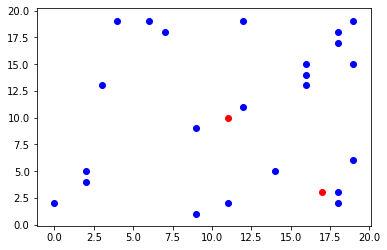

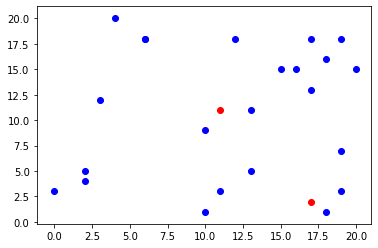

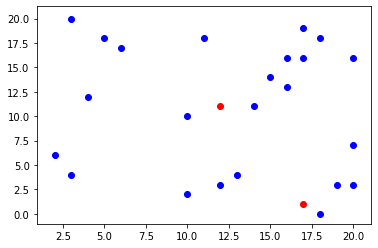

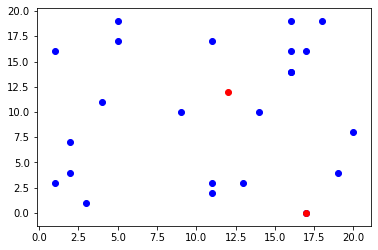

In [155]:
for i in range(15): #jumlah gerakan
    plt.figure()
    cek_jarak(i)
    waktu_pemulihan()
    for j in range(jumlah_sample): #jumlah orang
        if(arr_status[j] == 'sehat'):
            plt.scatter(x[j][i],y[j][i], color="blue")
        elif(arr_status[j] == 'sakit'):
            plt.scatter(x[j][i],y[j][i], color="red")

In [156]:
print("SESUDAH")
print(arr_waktuinfeksi)
print(arr_status)
print(arr_imunitas)
jml = 0
for i in range(jumlah_sample):
    if(arr_status[i] == "sakit"):
        jml += 1
print(jml)

SESUDAH
[11, 11, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 8, 0, 11, 0, 0, 0, 8, 0, 11, 0, 0]
['sehat', 'sehat', 'sehat', 'sehat', 'sehat', 'sehat', 'sehat', 'sehat', 'sehat', 'sehat', 'sehat', 'sehat', 'sehat', 'sehat', 'sakit', 'sehat', 'sehat', 'sehat', 'sehat', 'sehat', 'sakit', 'sehat', 'sehat', 'sehat', 'sehat']
[1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
2
